In [2]:
import matplotlib.pyplot as plt
import src.utils.utilities as util
import src.constants as cst
import os
import numpy as np
import seaborn as sb
import pandas as pd


print("CWD", os.path.abspath(os.getcwd()))

plt.rcParams["figure.figsize"] = [16, 9]
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["font.family"] = "serif"

CWD /Users/matteoprata/PycharmProjects/stock-price-trend-prediction/src/metrics


In [3]:
PATH = "../../data/experiments/LOB-CLASSIFIERS-(2023-01-21+13-18-47)/"

metrics = ['testing_FI_f1', 'testing_FI_precision', 'testing_FI_recall', 'testing_FI_accuracy', 'testing_FI_mcc']

In [4]:
METRICS = np.zeros(shape=(len(cst.Models), len(cst.FI_Horizons), len(metrics)))
for imod, mod in enumerate(cst.MODELS_YEAR_DICT):
    for ik, k in enumerate(cst.FI_Horizons):
        fname = "model={}-trst=FI-test=FI-data=FI-peri=FI-bw=None-fw=None-fiw={}.json".format(mod, k.value)
        jsn = util.read_json(PATH + fname)

        for imet, met in enumerate(metrics):
            METRICS[imod, ik, imet] = jsn[met]

In [5]:
METRICS_ORI = np.zeros(shape=(len(cst.Models), len(cst.FI_Horizons), len(metrics)))
for imod, mod in enumerate(cst.MODELS_YEAR_DICT):
    for ik, k in enumerate(cst.FI_Horizons):
        for imet, met in enumerate(cst.metrics_name):
            METRICS_ORI[imod, ik, imet] = cst.DECLARED_PERF[cst.Models[mod]][ik][imet]

In [6]:
CMS = np.zeros(shape=(len(cst.Models), len(cst.FI_Horizons), 3, 3))
for imod, mod in enumerate(cst.MODELS_YEAR_DICT):
    for ik, k in enumerate(cst.FI_Horizons):
        fname = "model={}-trst=FI-test=FI-data=FI-peri=FI-bw=None-fw=None-fiw={}.json".format(mod, k.value)
        jsn = util.read_json(PATH + fname)
        CMS[imod, ik] = np.array(jsn["cm"])

In [ ]:
def make_grouped_histo(met_name, met_vec, met_vec_original=None):  #2d input
    labels = [mod for mod in cst.MODELS_YEAR_DICT]

    fmt = "%.2f"
    miny, maxy = -1, 1
    if "MCC" not in met_name:
        met_vec = met_vec * 100
        fmt="%d%%"
        miny, maxy = 0, 100

    x = np.arange(len(labels)) * 5  # the label locations
    width = 0.70  # the width of the bars

    fig, ax = plt.subplots()

    r1 = ax.bar(x - width * 2, met_vec[:,0], width, label='K=1' , color=util.sample_color(0, "Set2"))
    r2 = ax.bar(x - width * 1, met_vec[:,1], width, label='K=2' , color=util.sample_color(1, "Set2"))
    r3 = ax.bar(x - width * 0, met_vec[:,2], width, label='K=3' , color=util.sample_color(2, "Set2"))
    r4 = ax.bar(x + width * 1, met_vec[:,3], width, label='K=5' , color=util.sample_color(3, "Set2"))
    r5 = ax.bar(x + width * 2, met_vec[:,4], width, label='K=10', color=util.sample_color(4, "Set2"))

    ax.bar_label(r1, padding=3, fmt=fmt, rotation=90, fontsize=10)
    ax.bar_label(r2, padding=3, fmt=fmt, rotation=90, fontsize=10)
    ax.bar_label(r3, padding=3, fmt=fmt, rotation=90, fontsize=10)
    ax.bar_label(r4, padding=3, fmt=fmt, rotation=90, fontsize=10)
    ax.bar_label(r5, padding=3, fmt=fmt, rotation=90, fontsize=10)

    if met_vec_original is not None:
        r11 = ax.bar(x - width * 2, met_vec_original[:,0], width, alpha=1, bottom=0, fill=False, edgecolor='black', label='original')
        r21 = ax.bar(x - width * 1, met_vec_original[:,1], width, alpha=1, bottom=0, fill=False, edgecolor='black')
        r31 = ax.bar(x - width * 0, met_vec_original[:,2], width, alpha=1, bottom=0, fill=False, edgecolor='black')
        r41 = ax.bar(x + width * 1, met_vec_original[:,3], width, alpha=1, bottom=0, fill=False, edgecolor='black')
        r51 = ax.bar(x + width * 2, met_vec_original[:,4], width, alpha=1, bottom=0, fill=False, edgecolor='black')

        lab_met_vec_original = met_vec_original[:]
        lab_met_vec_original = np.where((np.abs(lab_met_vec_original - met_vec) < 5), np.nan,  lab_met_vec_original)

        r11lab = ax.bar(x - width * 2, lab_met_vec_original[:,0], width, alpha=0, bottom=0, fill=False)
        r21lab = ax.bar(x - width * 1, lab_met_vec_original[:,1], width, alpha=0, bottom=0, fill=False)
        r31lab = ax.bar(x - width * 0, lab_met_vec_original[:,2], width, alpha=0, bottom=0, fill=False)
        r41lab = ax.bar(x + width * 1, lab_met_vec_original[:,3], width, alpha=0, bottom=0, fill=False)
        r51lab = ax.bar(x + width * 2, lab_met_vec_original[:,4], width, alpha=0, bottom=0, fill=False)


        ax.bar_label(r11lab, padding=3, fmt=fmt, rotation=90, fontsize=10)
        ax.bar_label(r21lab, padding=3, fmt=fmt, rotation=90, fontsize=10)
        ax.bar_label(r31lab, padding=3, fmt=fmt, rotation=90, fontsize=10)
        ax.bar_label(r41lab, padding=3, fmt=fmt, rotation=90, fontsize=10)
        ax.bar_label(r51lab, padding=3, fmt=fmt, rotation=90, fontsize=10)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(met_name)
    ax.set_title("FI-2010 " + met_name)
    ax.set_xticks(x, labels, rotation=30, ha="right", rotation_mode="anchor")

    ax.legend(fontsize=14)

    plt.ylim(miny, maxy)
    fig.tight_layout()

    plt.savefig("../../data/experiments/" + met_name + ".pdf")
    plt.show()
    plt.close(fig)

In [118]:
def make_grouped_histo_v2(met_name, met_vec, met_vec_original=None):  #2d input
    labels = ["K=" + str(k.value) for k in cst.FI_Horizons]

    fmt = "%.2f"
    miny, maxy = -1, 1.1
    if "MCC" not in met_name:
        met_vec = met_vec * 100
        fmt="%d%%"
        miny, maxy = 0, 110

    x = np.arange(len(labels)) * 5  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(16, 9))

    indsxs = np.array(range(1, int(len(cst.MODELS_YEAR_DICT)/2)+1))
    zero = [0] if len(cst.MODELS_YEAR_DICT) % 2 == 1 else []
    ranges = list(reversed(indsxs * -1)) + zero + list(indsxs)
    print(ranges)

    R = []
    for iri, ri in enumerate(cst.MODELS_YEAR_DICT):
        r_bar_i = ax.bar(x + width * ranges[iri], met_vec[iri, :], width, label=ri , color=util.sample_color(iri, "tab20"))
        R += [r_bar_i]

    diffp = ((met_vec - met_vec_original) / met_vec_original * 100)
    for iri, ri in enumerate(R):

        diffp_show = []
        for i, val in enumerate(diffp[iri,:]):
            our = round(met_vec[iri,i]) if "MCC" not in met_name else round(met_vec[iri,i], 2)
            if not np.isnan(val):
                diffp_show += ["{}% (".format(our) + "{0:+}%)".format(round(val))]
            else:
                diffp_show += ["{}% ($\cdot$)".format(our)]
            if "MCC" in met_name:
                diffp_show = [s.replace('%', '') for s in diffp_show]
        ax.bar_label(ri, labels=diffp_show, padding=3, fmt=fmt, rotation=90, fontsize=10)

    if met_vec_original is not None:
        for iri, ri in enumerate(cst.MODELS_YEAR_DICT):
            label = 'original' if iri == 0 else ''
            ax.bar(x + width * ranges[iri], met_vec_original[iri, :], width, alpha=1, bottom=0, fill=False, edgecolor='black', label=label)

        # lab_met_vec_original = met_vec_original[:]
        # lab_met_vec_original = np.where((np.abs(lab_met_vec_original - met_vec) < 5), np.nan,  lab_met_vec_original)
        #
        # RO = []
        # for iri, ri in enumerate(cst.MODELS_YEAR_DICT):
        #     r_bar_i = ax.bar(x + width * ranges[iri], lab_met_vec_original[iri, :], width, alpha=0, bottom=0, fill=False)
        #     RO += [r_bar_i]
        #
        # for ri in RO:
        #     ax.bar_label(ri, padding=3, fmt=fmt, rotation=90, fontsize=10)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(met_name)
    ax.set_title("FI-2010 " + met_name)
    ax.set_xticks(x, labels) #, rotation=0, ha="right", rotation_mode="anchor")

    ax.legend(fontsize=12, ncol=4, handleheight=2, labelspacing=0.05)

    plt.ylim(miny, maxy)
    fig.tight_layout()

    plt.savefig("../../data/experiments/ka" + met_name + ".pdf")
    plt.show()
    plt.close(fig)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


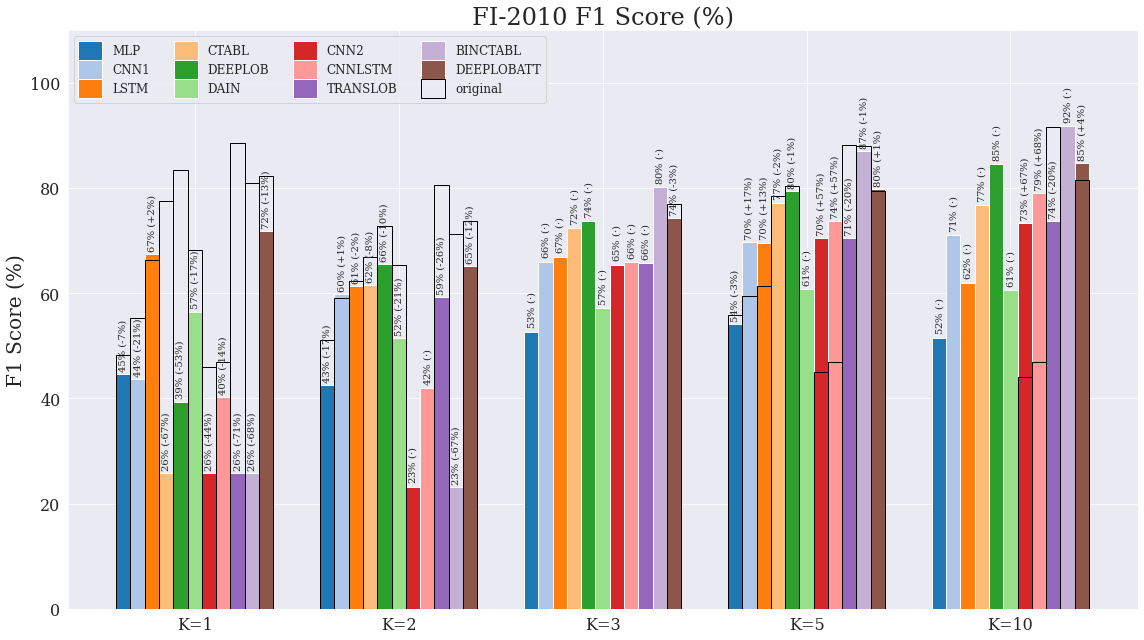

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


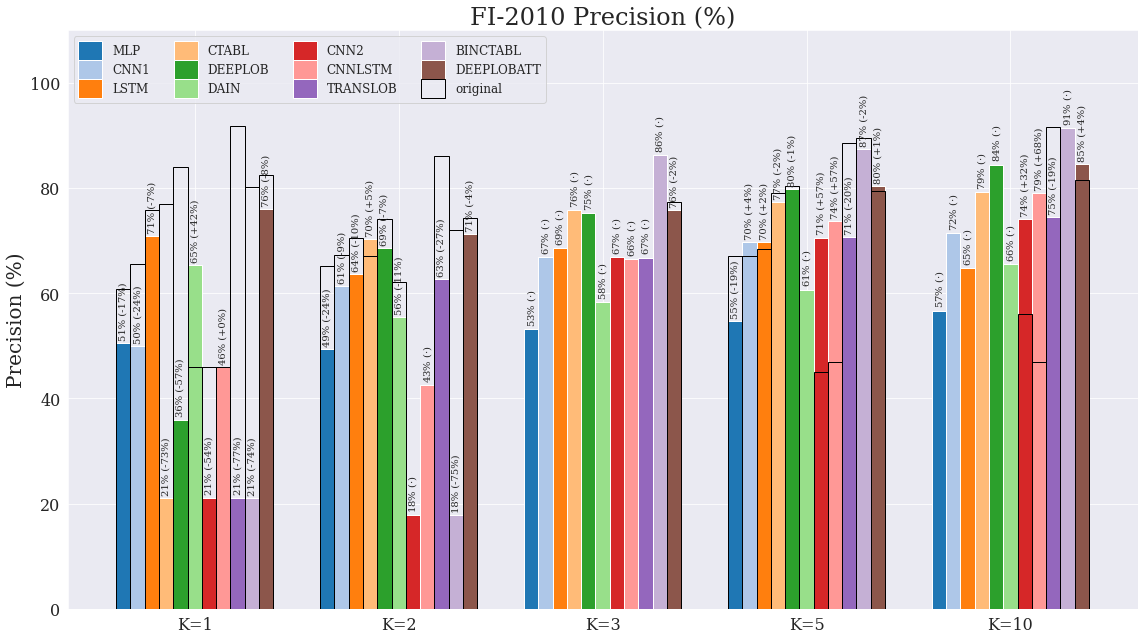

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


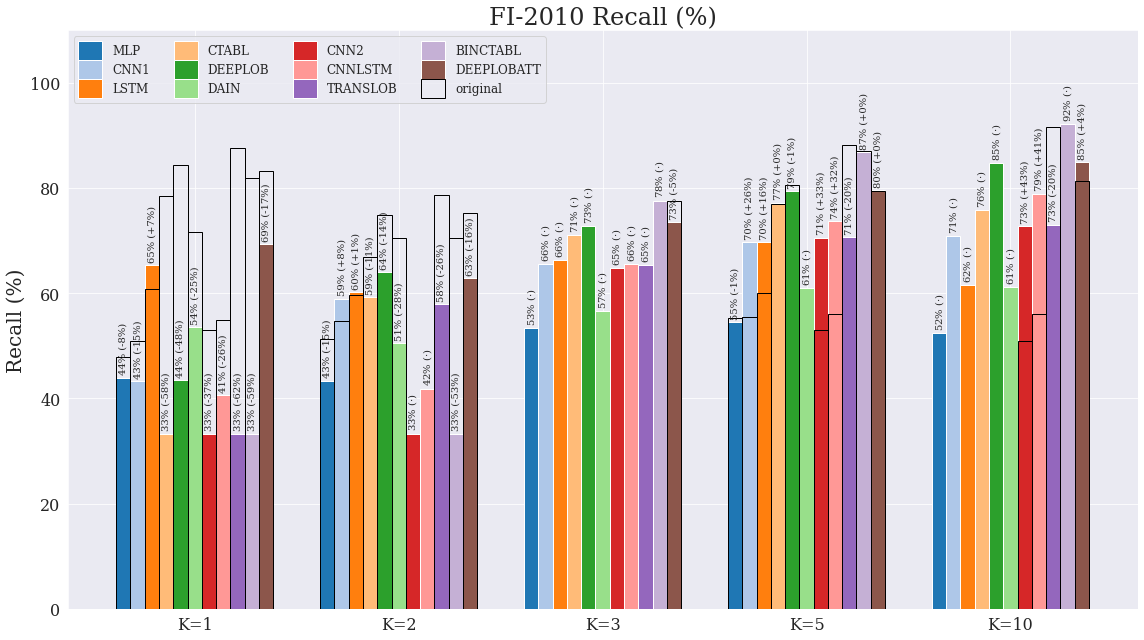

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


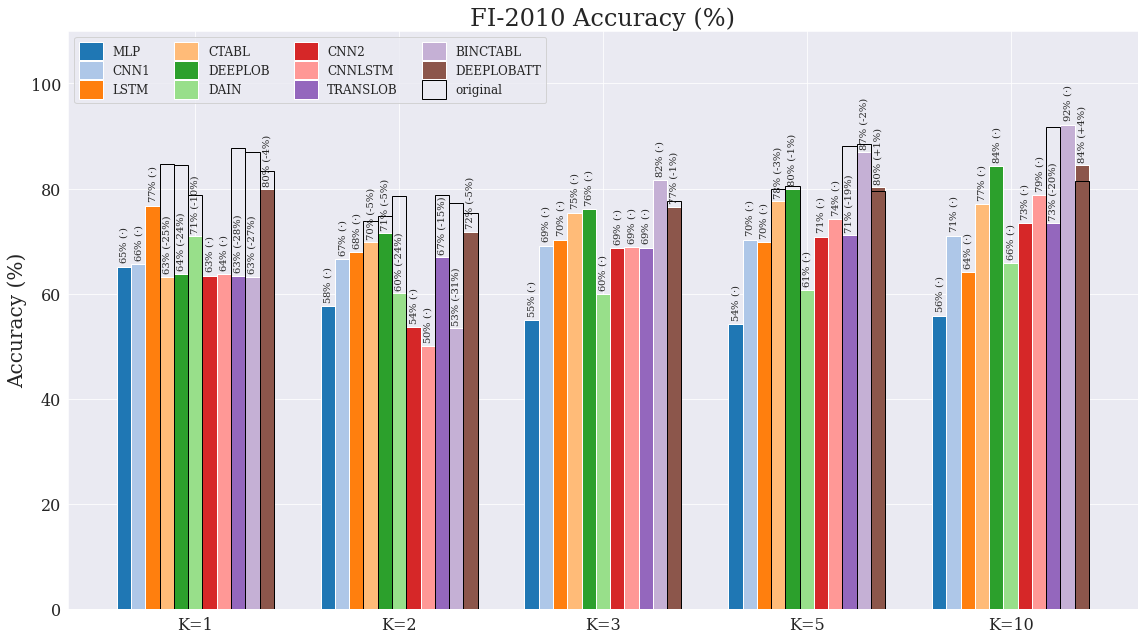

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]


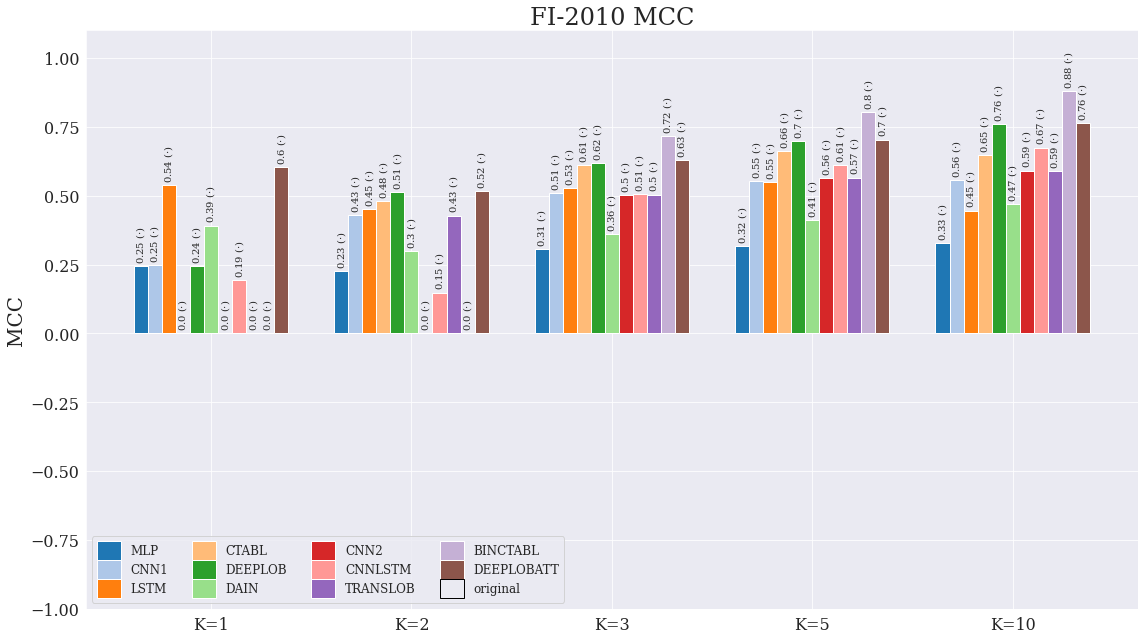

In [119]:
for imet, met in enumerate(cst.metrics_name):
    met_data = METRICS[:, :, imet]   # MODELS x K x METRICA
    met_data_ori = METRICS_ORI[:,:, imet]
    # make_grouped_histo(met, met_data, met_data_ori)
    make_grouped_histo_v2(met, met_data, met_data_ori)

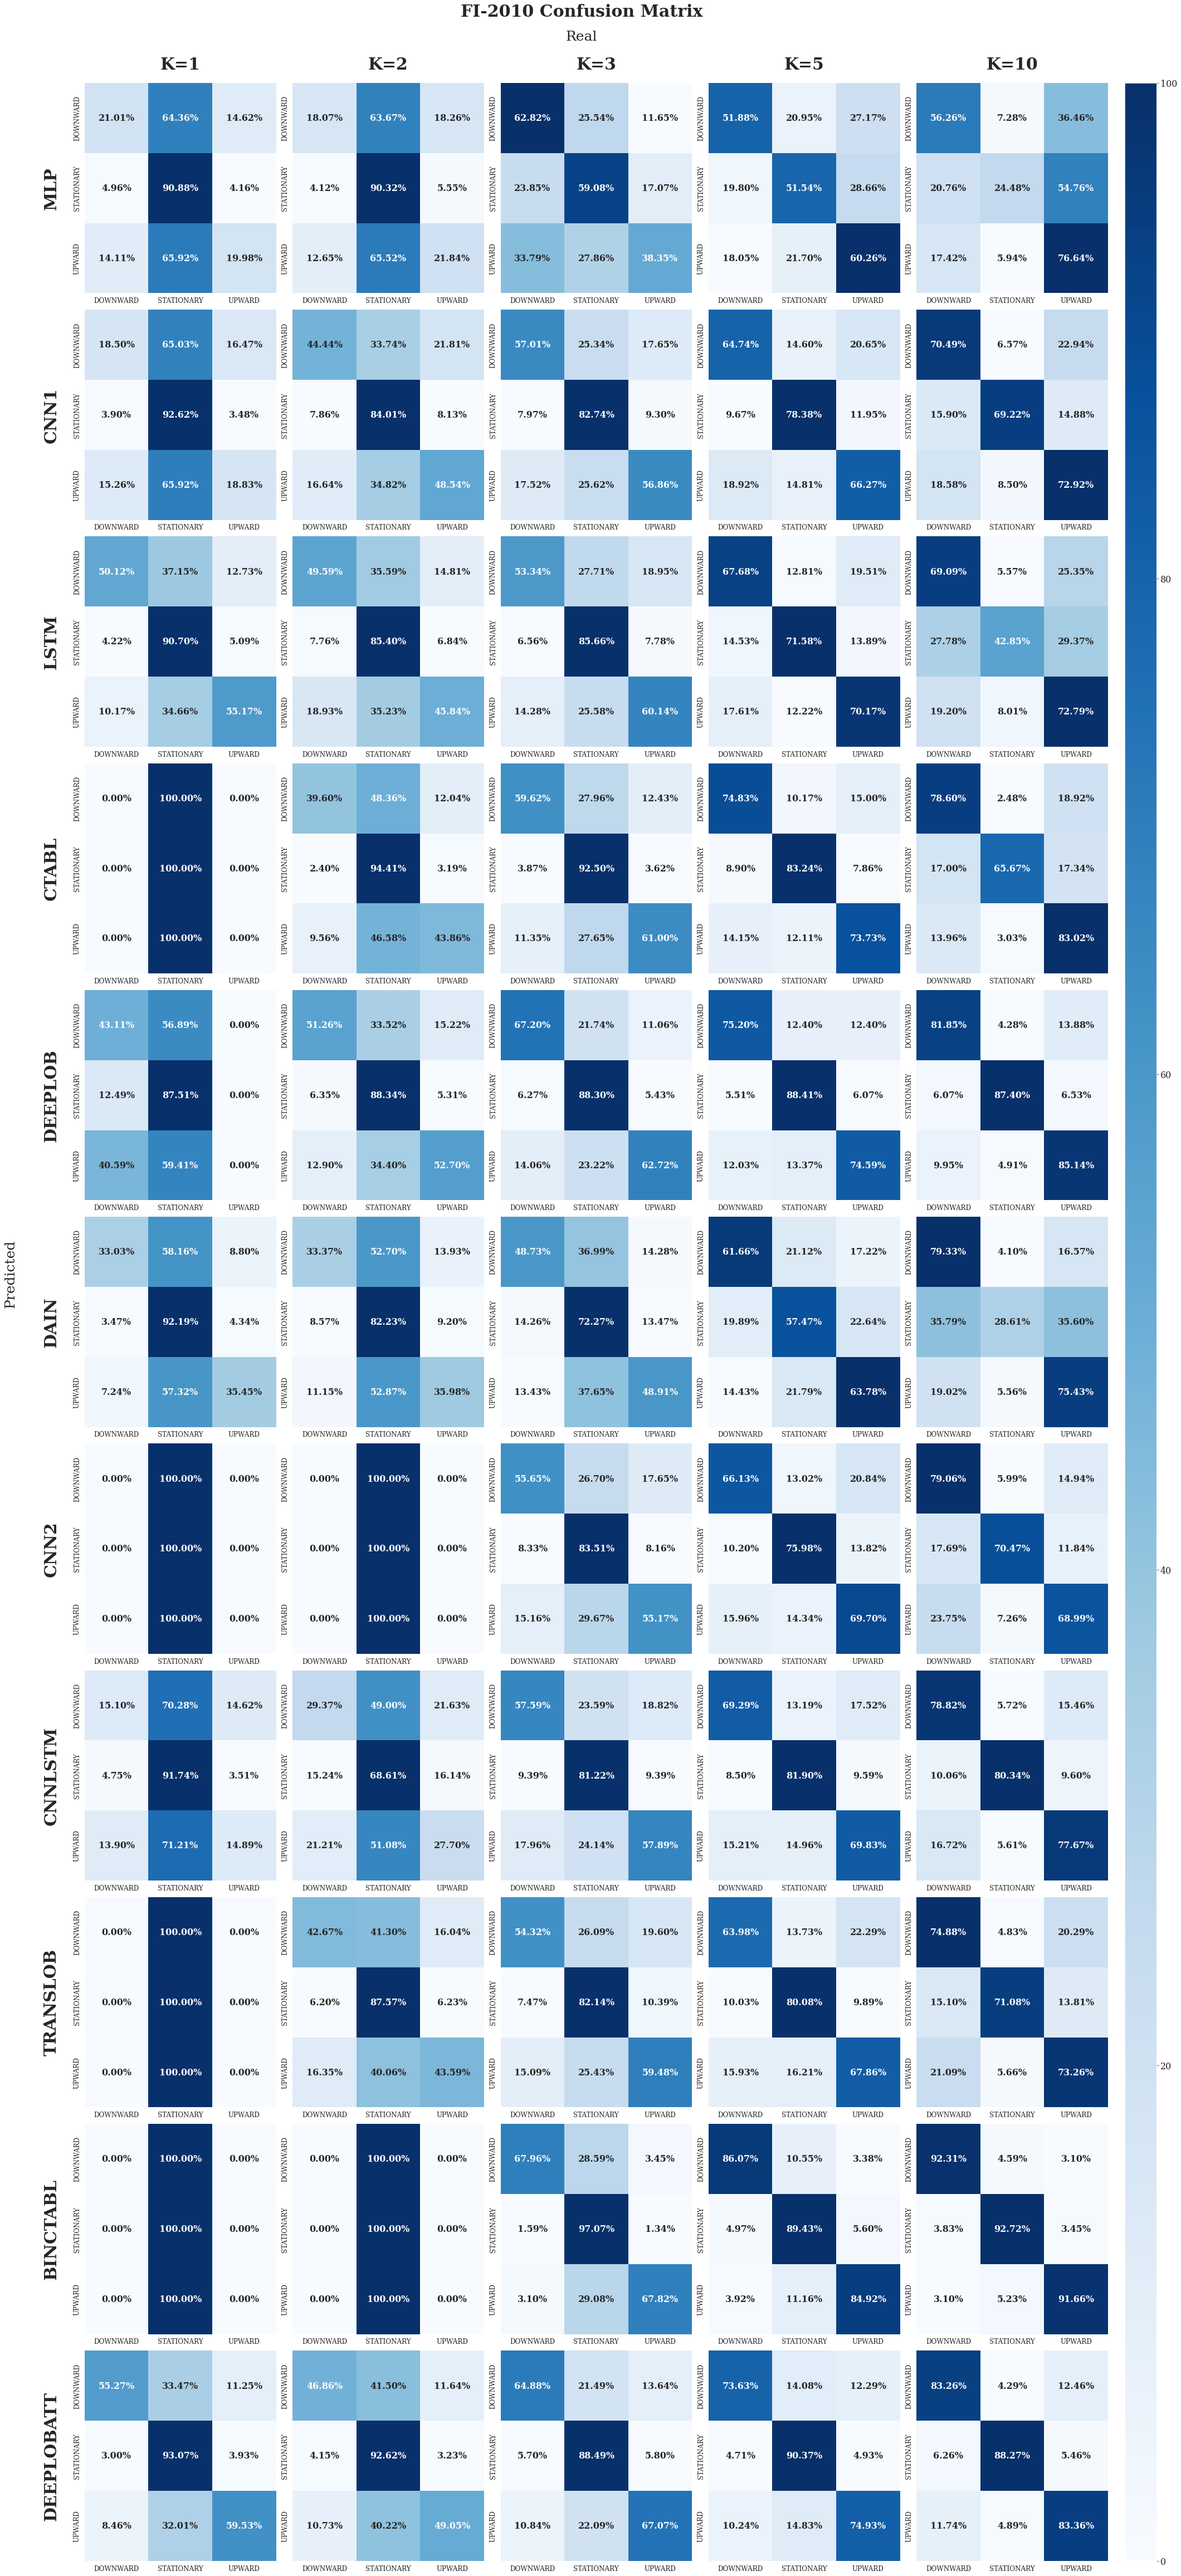

In [115]:
#fig, ax = plt.subplots(len(cst.MODELS_YEAR_DICT), len(cst.FI_Horizons)+1, figsize=(30, 30*2.2))
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(30, 30*2.2))
gs = gridspec.GridSpec(len(cst.MODELS_YEAR_DICT), len(cst.FI_Horizons)+1, width_ratios=[6 for _ in range(len(cst.FI_Horizons))] + [1], figure=fig)

annot_kws={
    'fontsize': 16,
    'fontweight': 'bold',
    'fontfamily': 'serif'
}

for imod, mod in enumerate(cst.MODELS_YEAR_DICT):
    for ik, k in enumerate(cst.FI_Horizons):
        cbar = False  # ik == 0 and imod == 0
        csm_norm = CMS[imod, ik] / np.sum(CMS[imod, ik], axis=1)[:, None]

        axi = fig.add_subplot(gs[imod, ik])
        sb.heatmap(csm_norm, annot=True, ax=axi, cbar=cbar, fmt=".2%", cmap="Blues", annot_kws=annot_kws)

        axi.set_xticklabels([p.name for p in cst.Predictions], rotation=0,  fontsize=12)
        axi.set_yticklabels([p.name for p in cst.Predictions], rotation=90, fontsize=12)

        if imod == 0:
            axi.set_title("K={}".format(k.value), fontsize=30, fontweight="bold", pad=25)

        if ik == 0:
            axi.set_ylabel(mod, fontsize=30, fontweight="bold", labelpad=25)

legend_ax = fig.add_subplot(gs[:, -1])

sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(0, 100))
sm.set_array([])

fig.colorbar(sm, cax=legend_ax)

fig.supylabel('Predicted', x=0.02, fontsize=25)
fig.supxlabel('Real',      y=.965, fontsize=25)
fig.suptitle('FI-2010 Confusion Matrix', y=.98, fontsize=30, fontweight="bold")

fig.tight_layout()
fig.subplots_adjust(top=.95, left=.087)

fig.savefig("../../data/experiments/cm-fi.pdf")
plt.show()
plt.close(fig)

In [ ]:
def scatter_plot_year(met_name, met_data, mod_names):
    X = cst.MODELS_YEAR_DICT.values()

    fig = plt.figure(figsize=(16, 9))
    df = pd.DataFrame(dict(id=cst.MODELS_YEAR_DICT.values(), data=met_data))
    maxes = df.groupby('id')['data'].max()

    plt.plot(maxes.index, maxes, color="red", label="max")
    plt.scatter(cst.MODELS_YEAR_DICT.values(), met_data, color="red")

    for label, x, y in zip(mod_names, X, met_data):
        plt.annotate(
            label,
            fontsize=20,
            xy = (x, y), xytext = (+80, -40),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round, pad=0.5', fc = 'red', alpha = 0.3),
            arrowprops = dict(arrowstyle = 'wedge', connectionstyle = 'arc3, rad=0'))

    plt.xlabel('Year')
    plt.ylabel(met_name)
    plt.xticks([int(i) for i in maxes.index])
    plt.legend(fontsize=20, loc="upper left")
    plt.title("FI-2010 {} in the Years".format(met_name))
    plt.tight_layout()
    plt.savefig("../../data/experiments/year-" + met_name + ".pdf")
    plt.show()
    plt.close()

In [ ]:
for imet, met in enumerate(cst.metrics_name):
    met_data = METRICS[:, :, imet]   # MODELS x K x METRICA
    met_data_ori = METRICS_ORI[:,:, imet]
    scatter_plot_year(met, np.max(met_data, axis=1), cst.MODELS_YEAR_DICT.keys())